TP1: Introduction aux opérateurs de base de PyTorch (Décomposition d'une image à l'aide d'ondelette de Haar et autres traitement)
============

Introduction au sujet
------

L'objectif de ce sujet est d'étudier des opérateurs de base de Pytorch au travers de la décomposition par ondelette de Haar d'une image. La décomposition d'une image en ondelette est notamment utilisé en compression dans des formats de fichier tel que JPEG2000. Nous travaillerons sur une photographie d'[Ada Lovelace](https://fr.wikipedia.org/wiki/Ada_Lovelace) qui vous est fournis. 

Le code est à écrire en python3 à la suite des questions dans ce fichier. Vous appuierez soit sur le bouton *run cell*, soit sur les touches *Ctrl-Entrée*, à l’intérieur de la zone de saisie, pour lancer l'exécution de vos commandes. Si la commande est en cours d’exécution une étoile apparaît à côté de la zone de saisie de la commande : In [\*]. Une fois le calcul achevé, l'étoile est remplacée par le numéro du run permettant de retrouver par la suite dans quel ordre ont été lancés chaque bloc.

N'hésitez pas à regarder régulièrement la documentation de ces librairies, des exemples d'utilisation accompagnent généralement l'explication de chaque fonction.

Langage utilisé:
- Python 3: https://docs.python.org/3/

Librairie de math:
- Numpy: https://docs.scipy.org/doc/numpy/reference/
- Scipy: https://docs.scipy.org/doc/scipy/reference/

Librairie d'affichage de données:
- Matplotilb: https://matplotlib.org/contents.html

Librairie Pytorch:
- PyTorch: https: https://pytorch.org/docs/stable/

Commencez par importer les librairies nécessaires au TP.

In [1]:
# Import Torch
import torch
import torch.nn as nn

# Import numpy et matplotlib
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

0 - Introduction au notebook jupyter
----------

Exécutez la ligne suivante en vous plaçant dans la cellule et en appuyant sur *Ctrl+Entrée*.

In [2]:
a=1
print(a)

1


Lancez la ligne suivante plusieurs fois. 

In [3]:
a += 1
print(a)

2


Relancez le premier bloc définissant la variable `a` puis lancez le bloc suivant (remarquez bien les valeurs après In [\*] ):

In [4]:
print(a)

2


Vous pouvez utiliser l'aide à la complétion avec tab. Testez avec la fonction numpy.random.randn.

Vous pouvez accéder à la documentation de la fonction avec *Shit+tab*. Pour plus d'information, cliquez sur le +. Testez avec la fonction numpy.random.randn.

Testez le code suivant et comprenez-le :

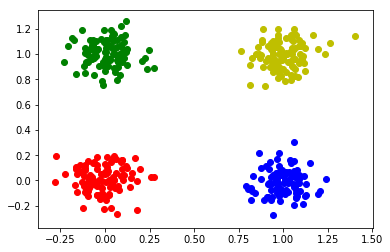

In [5]:
X = 0.1*np.random.randn(100,4,2)+np.array([[0,0],[0,1],[1,0],[1,1]])
for i in range(4):
    plt.scatter(X[:,i,0],X[:,i,1],c='rgby'[i])

plt.show()

1 - Visualisation des données (Matplotlib)<a id="title1.3"></a> 
-----

`Matplotlib` permet de construire une figure à visualiser. La création d'une figure ce fait à l'aide de l'instruction `plt.figure`. Toutes les instructions que l'on fait ensuite agissent sur la figure courante en mémoire mais ne sont pas directement visibles. Afin de rendre effectivement visible la figure finale, on utilise l'instruction `plt.show`. Cette instruction est bloquante en python standard. 
Testez le code suivant affichant un `sinus` et un `cosinus`.

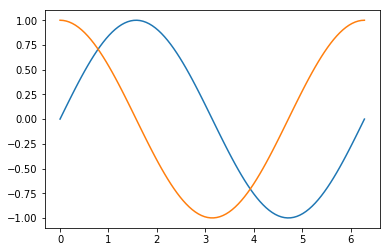

In [6]:
x = torch.linspace(0,2*np.pi,100) # création de 100 points entre 0 et 2pi
plt.figure() # Création d'une figure
plt.plot(x,torch.sin(x)) # Ajout du tracé d'un sinus composé de 100 points reliés par des droites entre 0 et 2pi
plt.plot(x,torch.cos(x)) # Ajout du tracé d'un cosinus composé de 100 points reliés par des droites entre 0 et 2pi
plt.show() # Affichage de la figure créée.

Regardez le code suivant. Il permet de tracer la fonction sinus en rouge en mettant des carrés (square == s) aux points vraiment calculés et en les reliant par une droite. Le deuxième tracé est la fonction sinus en bleu, seul les points sous la forme d'étoile sont tracés.

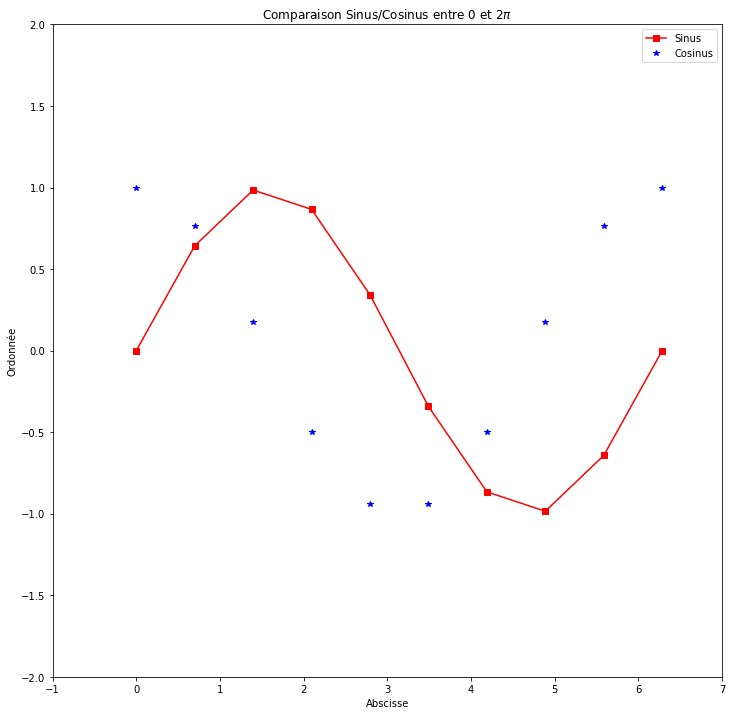

In [7]:
x = torch.linspace(0,2*np.pi,10)

plt.figure(figsize=(12,12)) # définition d'une figure en précisant sa taille

# Courbes
plt.plot(x,torch.sin(x),'rs-',label='Sinus')
plt.plot(x,torch.cos(x),'b*',label='Cosinus')

# Titre et légende
plt.title('Comparaison Sinus/Cosinus entre 0 et $2\pi$')
plt.legend()

# Texte des axes
plt.xlabel('Abscisse')
plt.ylabel('Ordonnée')

# Définition des limites des axes
plt.xlim([-1,7])
plt.ylim([-2,2])

plt.show() # Affichage de la figure créée.

Attention l'ordre des points est important si on souhaite les reliés:

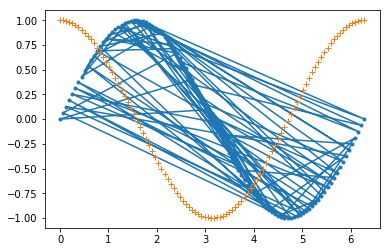

In [8]:
x = np.linspace(0,2*np.pi,100)
np.random.shuffle(x)
plt.figure()
plt.plot(x,np.sin(x),'.-')
plt.plot(x,np.cos(x),'+')
plt.show()

Faites une figure affichant à la fois la fonction sinus cardinal de $x$ ($sinc(x)=\dfrac{sin(x)}{x}$) et l'inverse de x. Vous mettrez la fonction inverse en pointillé. Vous ajouterez également un titre et une légende.

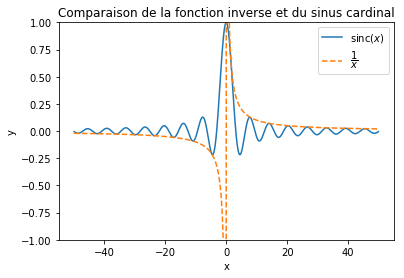

La fonction `plt.scatter` permet d'afficher spécifiquement des points qui ne seront pas reliés. Elle permet notamment d'afficher des points de couleurs et tailles différentes.

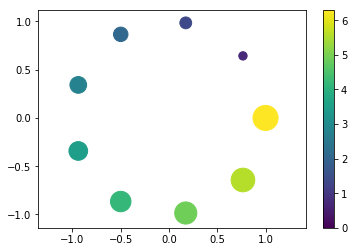

In [10]:
t = np.linspace(0,2*np.pi,10)
plt.figure()
plt.scatter(np.cos(t),np.sin(t),c=t,s=100*t)
plt.axis('equal') # pour avoir des axes avec les mêmes proportions.
plt.colorbar() # Échelle des valeurs associées aux couleurs 

#cbar = plt.colorbar(ticks=[0,np.pi,2*np.pi])
#cbar.ax.set_yticklabels(["Low","Medium","High"])

plt.show()

La fonction `plt.imshow` permet d'afficher un tableau comme une image. Les valeurs doivent être soit entières entre 0 et 255 soit flottantes entre 0. et 1. .

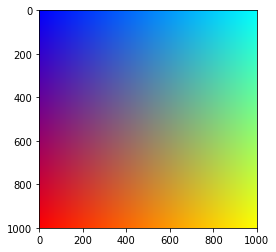

In [11]:
n=int(1e3)
x = np.linspace(0,1,n)
degradee = np.tile(x[:,np.newaxis],n)
im = np.stack((degradee,degradee.T,1-degradee),axis=2)

plt.figure()
plt.imshow(im)
plt.show()

Si le tableau est une matrice, l'image sera affichée en fausse couleurs correspondant à la carte de couleur paramétrée. Pour avoir une image en noir et blanc, il faudra préciser `cmap='gray'`.

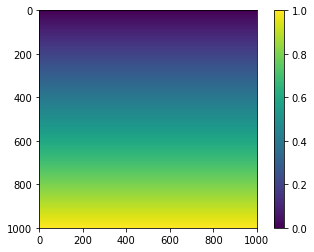

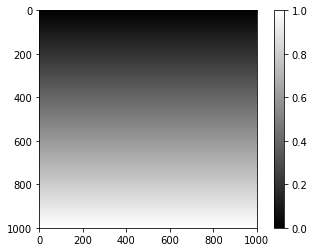

In [12]:
plt.figure()
plt.imshow(degradee)
plt.colorbar()

plt.figure()
plt.imshow(degradee,cmap='gray')
plt.colorbar()

plt.show()

2 - Décomposition d'une image à l'aide d'ondelette de Haar
----

Commencez par importer l'image sur lequel nous allons travailler à l'aide de l'instruction suivante:

In [13]:
im = plt.imread('ada.png')
#im = plt.imread('ada_color_1844_400x400.jpg')/255

Affichez l'image avec matplotlib.

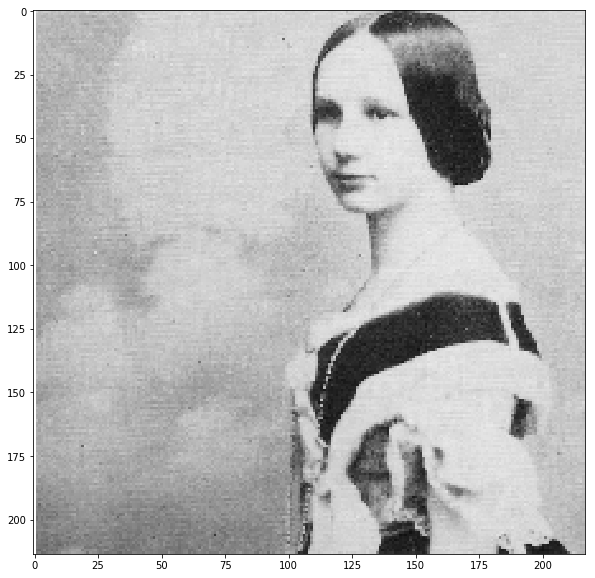

Convertissez l'image en `Tensor` Pytorch.

L'image que vous avez chargée est considéré comme une image couleur, les trois canaux sont identiques. Gardez uniquement un seul canal. 

Ancienen dimension de l'image: torch.Size([214, 217, 4])
Nouvelle dimension de l'image: torch.Size([214, 217])


L'image fait actuellement 214x217. Tronquez l'image pour ne garder que les 200 premières lignes et colonnes.

Ancienen dimension de l'image: torch.Size([214, 217])
Nouvelle dimension de l'image: torch.Size([200, 200])


Appliquez un `average pooling` sur l'image en utilisant la fonction se trouvant dans `torch.nn.functional` . Faites en sortes que la nouvelle image soit quatre fois plus petite que la précédente.

Dimension de im_avg: torch.Size([1, 1, 50, 50])


Affichez l'image de la question précédente. Quel a eu comme effet sur l'image l'application de la couche d' `average pooling` ?

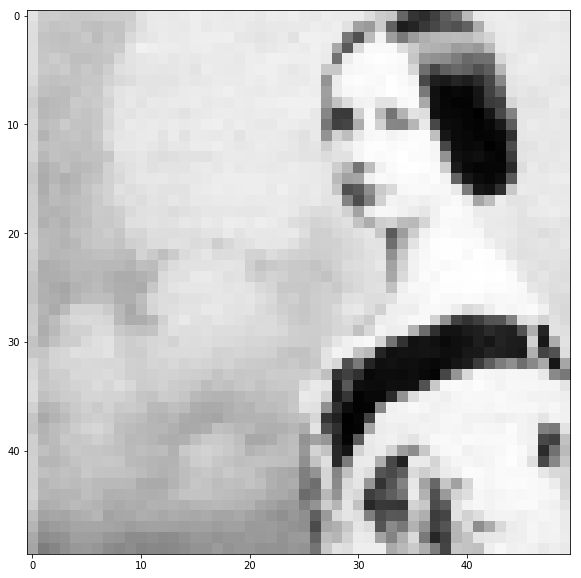

Effectuez maintenant un `average pooling` en moyennant uniquement les colonnes de l'image deux par deux.

Dimension de im_avg2: torch.Size([1, 1, 200, 100])


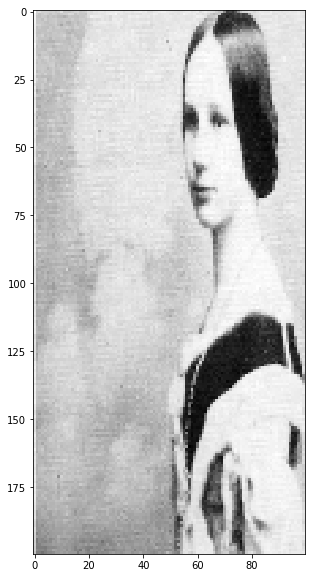

Déclarez un vecteur contenant deux 1 que vous nommerez `f`. Faites en sortes que les dimensions de `f` soit (1,2).

f = tensor([[1., 1.]])
Dimension de f: torch.Size([1, 2])


Faites une convolution entre l'image et le filtre `f` avec un `stride` de 1 sur les lignes et 2 sur les colonnes. Vous utiliserez la fonction se trouvant dans `torch.nn.functional`.

Expliquez pourquoi on obtient un résultat similaire à l'utilisation d'un `average pooling` à un facteur près.

Dimension im_conv1: torch.Size([1, 1, 200, 100])


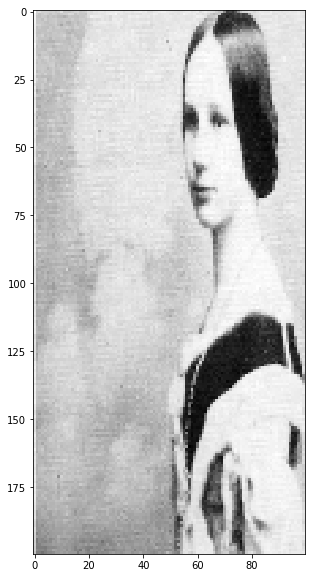

En utilisant un filtre de convolution bien choisi. Calculez l'image tel que chaque pixel correspond au calcul de $x_{i,j}-x_{i+1,j}$ où $x_{i,j}$ est le pixel de la ligne $i$, colonne $j$.

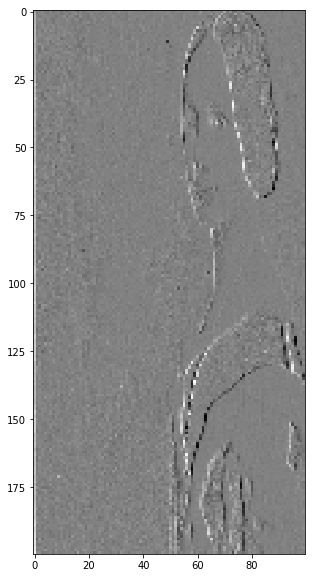

En construisant un filtre approprié, faites en sortes d'utiliser une seule convolution pour produire les deux images précédentes en même temps. Le résultat de chacune des convolutions correspondra à un canal. Vous appellerez le tenseur de sortie `im_out1` et le noyau utilisé `k_colonne`.

Dimension de sortie des deux convolutions:  torch.Size([1, 2, 200, 100])


Affichez `im_out1` en deux images.

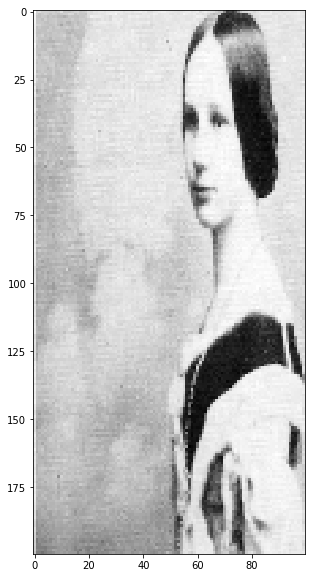

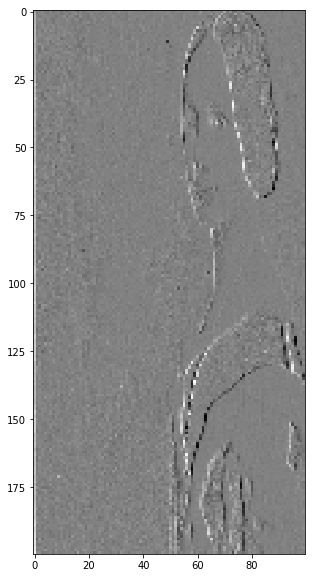

L'une des images correspond à l'application d'un filtre passe bas sur les colonnes et l'autre à un filtre passe haut. Expliquez quelle image est associé à quel filtre et pourquoi.

En utilisant un `reshape` approprié, affichez les deux canaux de `im_out1` concaténer sur les lignes en une image. Les valeurs des images n'ayant pas la même dynamique et n'étant pas entre 0 et 1, le rendu sera différent des questions précédentes, il ne vous est pas demandé de corriger le rendu.

(tensor(0.1490), tensor(1.8275), tensor(-0.6667), tensor(0.6549))

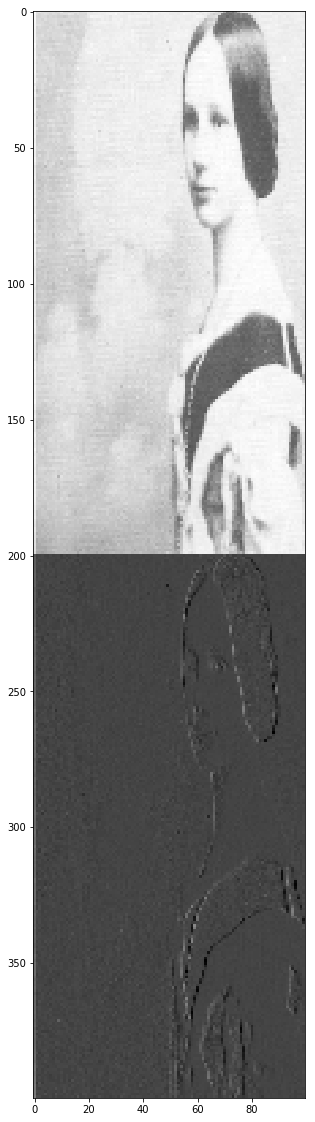

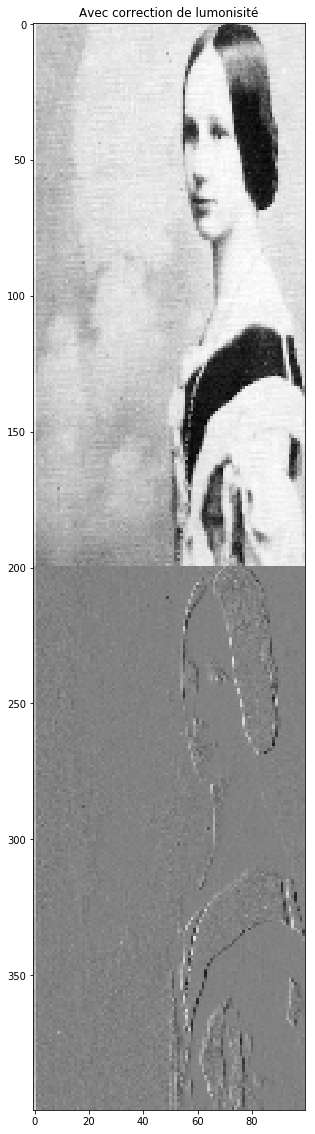

En utilisant la fonction `torch.transpose` en plus de la fonction `reshape`, concaténez les deux canaux sur les colonnes et affichez l'image obtenue.

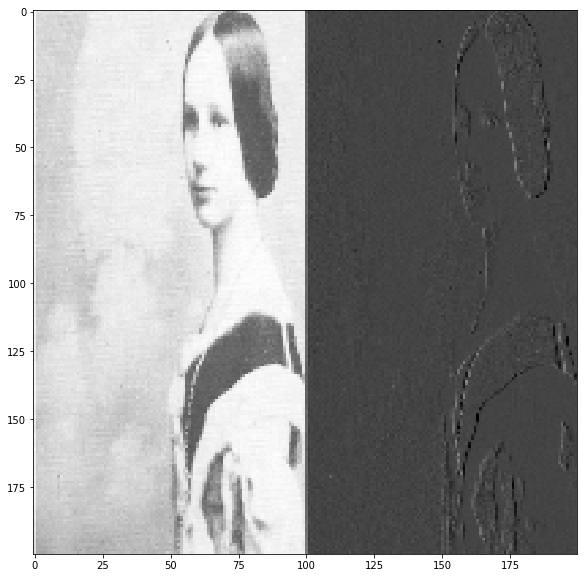

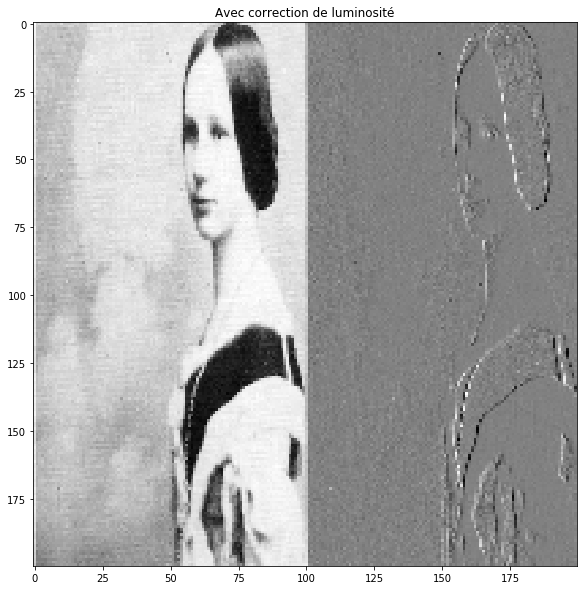

Définissez maintenant un noyau permettant de faire les deux filtrages précédent sur les lignes et non sur les colonnes. Appelez ce noyau `k_ligne`.

tensor([[ 1.,  1.],
        [ 1., -1.]])


Appliquez le noyau de convolution de la question précédente avec un `stride` adapté pour faire maintenant un filtrage passe base et passe haut selon les lignes.

Dimension de sortie des deux convolutions:  torch.Size([1, 2, 100, 199])


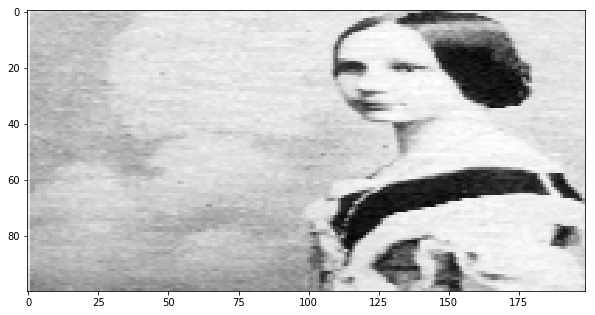

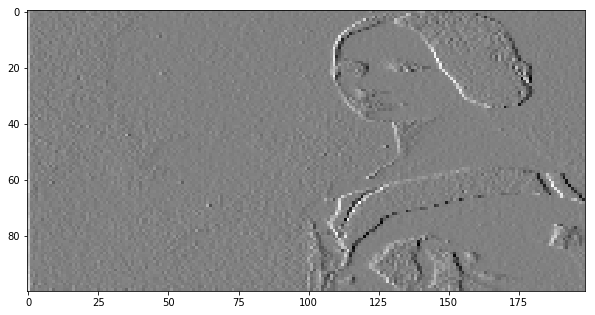

Concaténez `k_ligne` avec lui-même selon les lignes pour avoir un noyau `k_ligne2` de dimension `4,2`.

Dimensions de k_ligne2 torch.Size([4, 2])


Utilisez le noyau `k_ligne2` sur `im_out1`. Le résultat s'appellera `im_out2`. Changez le `stride` pour vous déplacer de 2 en 2 sur les lignes et de 1 en 1 sur les colonnes. Vous mettrez également l'argument `groups` à 2 et vous expliquerez l'intérêt de cette opération.

Affichez les 4 canaux obtenus dans la question précédente. Expliquez à quoi correspond chacun de ces canaux en termes de filtrage. Ces 4 images correspondent à la décomposition par ondelette de Haar de l'image initiale.

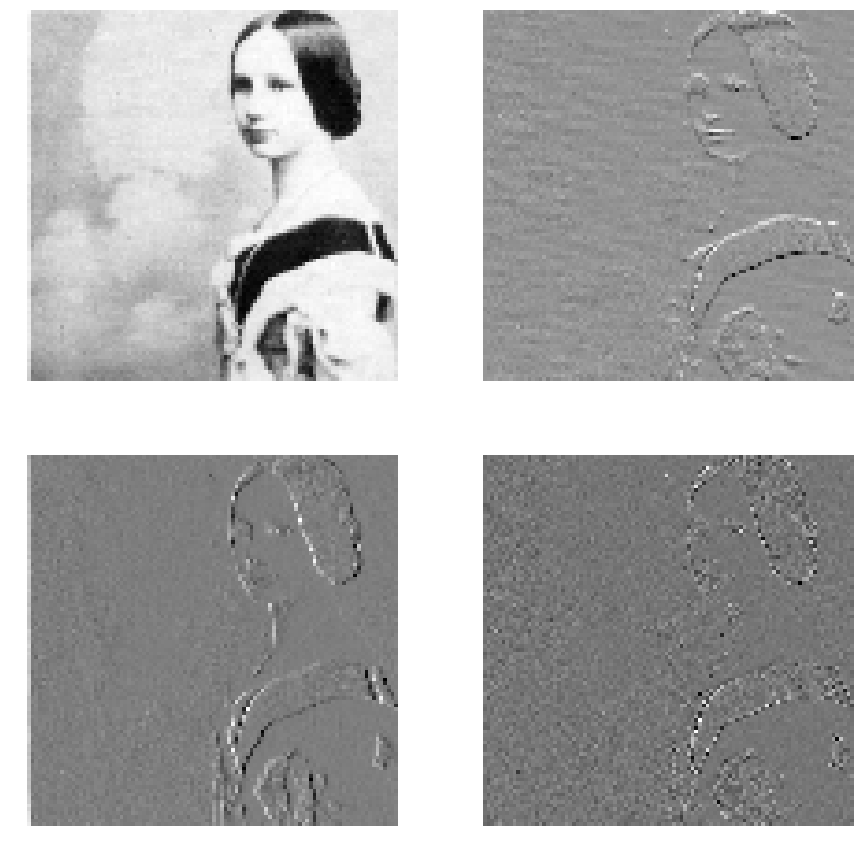

3 - Retrouver une transformation à partir de l'image générée
---

Afin de construire la décomposition en ondelette nous avons dans la question précédente appliqué deux convolutions successives. Le graphe de calcul que nous avons mis en place est de type image -> convolution 1 -> convolution 2 . L'enchainement de deux convolutions peut être facilement simplifié en une seule convolution (que l'on appellera convolution 12). Nous allons faire comme si on ne connaissait pas les noyaux de deux convolutions et on va essayer de retrouver la valeur du noyau utilisé pour convolution 12 à partir de l'image source et de l'image produite.  

En utilisant une classe se trouvant `torch.nn` déclarez un objet `conv12` qui permettra d'appliquer une convolution à une image. Le noyau utilisé sera de taille 2x2 avec un `stride` de 2 et il ne faudra pas utiliser de biais

Regardez la valeur du noyau que contient la couche `conv12` (elle se trouve dans l'attribut `weight`). Cette valeur a été choisie aléatoirement et changera à chaque lancement.

Valeur du noyau: Parameter containing:
tensor([[[[ 0.0767, -0.1094],
          [-0.1053,  0.3126]]],


        [[[ 0.3462,  0.1797],
          [ 0.0889, -0.2448]]],


        [[[-0.4916, -0.4406],
          [-0.3816, -0.0313]]],


        [[[ 0.0633, -0.0789],
          [-0.2606,  0.3894]]]], requires_grad=True)


Appliquez la couche de convolution `conv12` à l'image initiale et visualisez le résultat.

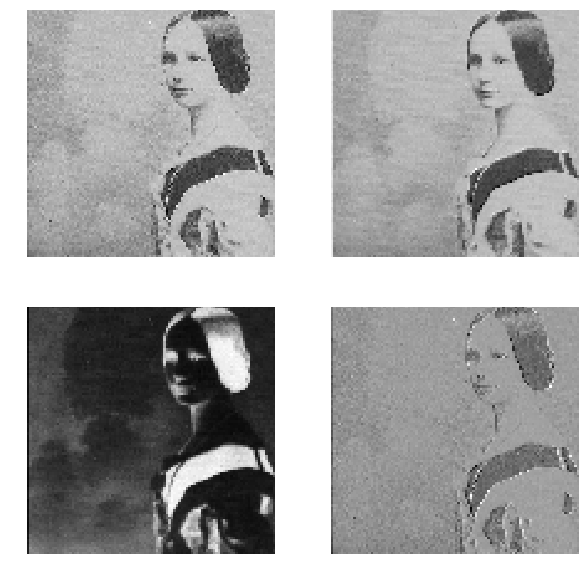

En utilisant une fonction de coût de type MSE (Mean Squared Error) calculer l'écart entre le tenseur de sortie de `conv12` et `im_out2`.

Valeur de la fonction de coût: tensor(2.2489, grad_fn=<MseLossBackward>)


Appliquez la rétropropagation du gradient et affichez les valeurs de gradient pour les paramètres de la convolution.

Valeur de $\dfrac{\partial\ \text{loss}}{\partial w}$:

tensor([[[[-1.0343, -1.0296],
          [-1.0332, -1.0288]]],


        [[[ 0.0989,  0.0981],
          [ 0.1013,  0.1005]]],


        [[[-0.3689, -0.3623],
          [-0.3679, -0.3616]]],


        [[[ 0.0294,  0.0307],
          [ 0.0303,  0.0300]]]])

Mettez à jours la valeur du poids de la convolution en effectuant une étape de descente de gradient. Pour faire cela vous calculerez: $w \longleftarrow w - \alpha \dfrac{\partial\ \text{loss}}{\partial w}$ en prenant $\alpha=1$. Attention pour pouvoir faire cette opération vous devez désactiver temporairement l'utilisation du gradient dans le graphe.

Remettez à zéros les valeurs du gradient.

Refaites de même pour 500 itérations de descente de gradient

Fonction de coût après 10000 itérations: tensor(5.0836e-08, grad_fn=<MseLossBackward>)
Noyau trouvé: Parameter containing:
tensor([[[[ 1.0017,  0.9983],
          [ 0.9983,  1.0018]]],


        [[[ 0.9999,  1.0001],
          [-0.9999, -1.0001]]],


        [[[ 0.9991, -0.9991],
          [ 1.0009, -1.0010]]],


        [[[ 0.9932, -0.9931],
          [-0.9931,  0.9929]]]], requires_grad=True)


À votre avis quel devrait être la valeur du noyau que nous cherchons ? Vérifiez que ces valeurs donnent le résultat attendu.

Valeur de la fonction de coût avec le noyau optimal 3.5008343930888327e-15


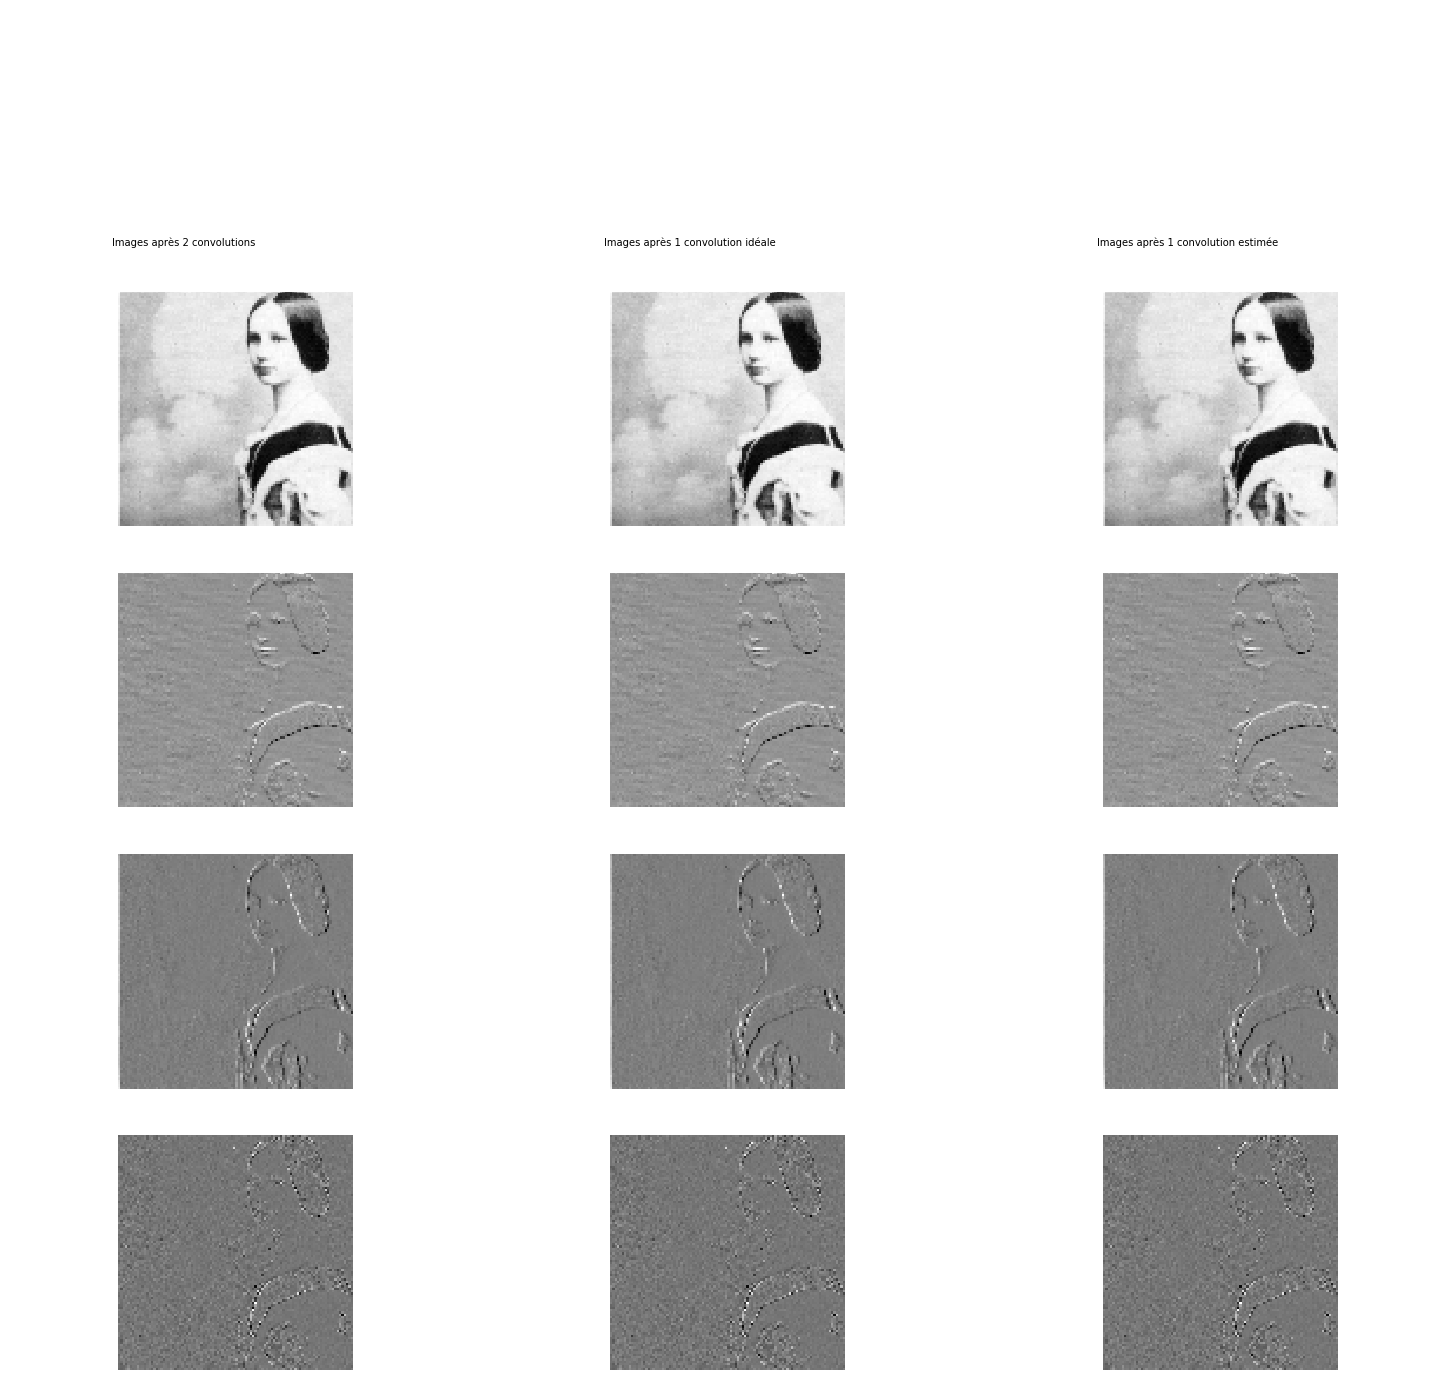

4 - Reconstruction d'une image à partir de sa décomposition en ondelette
---

Pour reconstruire l'image à partir de sa décomposition, vous devez utiliser l'opération inverse de celle faite précédemment. En utilisant l'opérateur de convolution transpose, reconstruisez l'image.

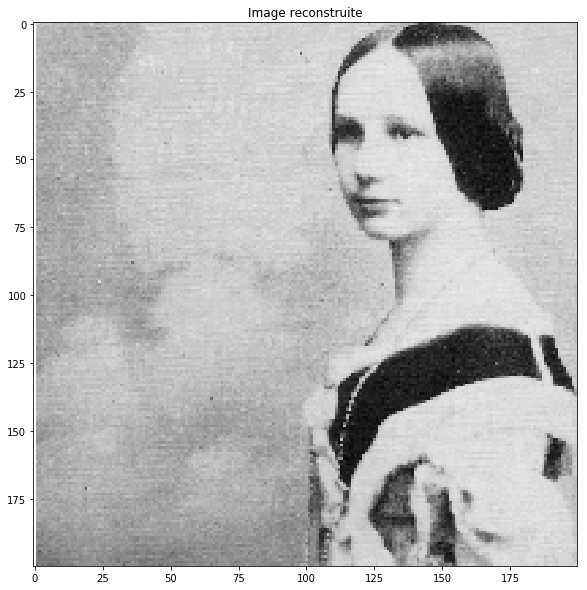

En utilisant la fonction `plt.hist` de `matplotlib`. Visualisez l'histogramme des valeurs de chaque canal de la décomposition. Vous utiliserez 100 `bins` pour chaque histogramme. 

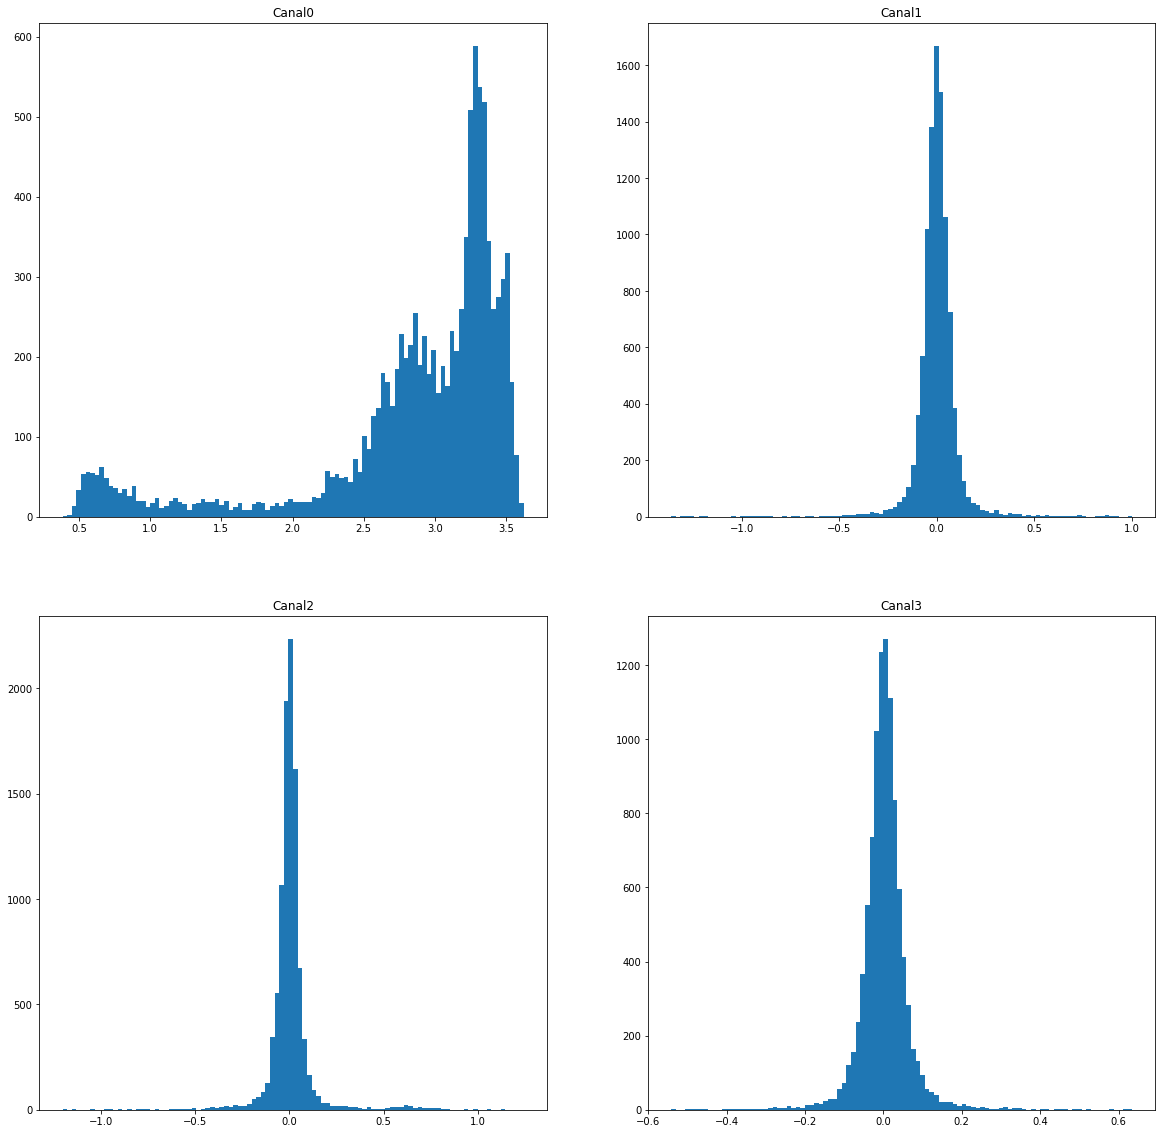

Que pouvez-vous dire sur la répartition des valeurs dans chaque canal ?

En utilisant la fonction d'activation `hardshrink` appliquez un écrasement des valeurs entre -0.1 et 0.1 sur 0 du tenseur `im_out2`. Affichez les nouveaux histogrammes.

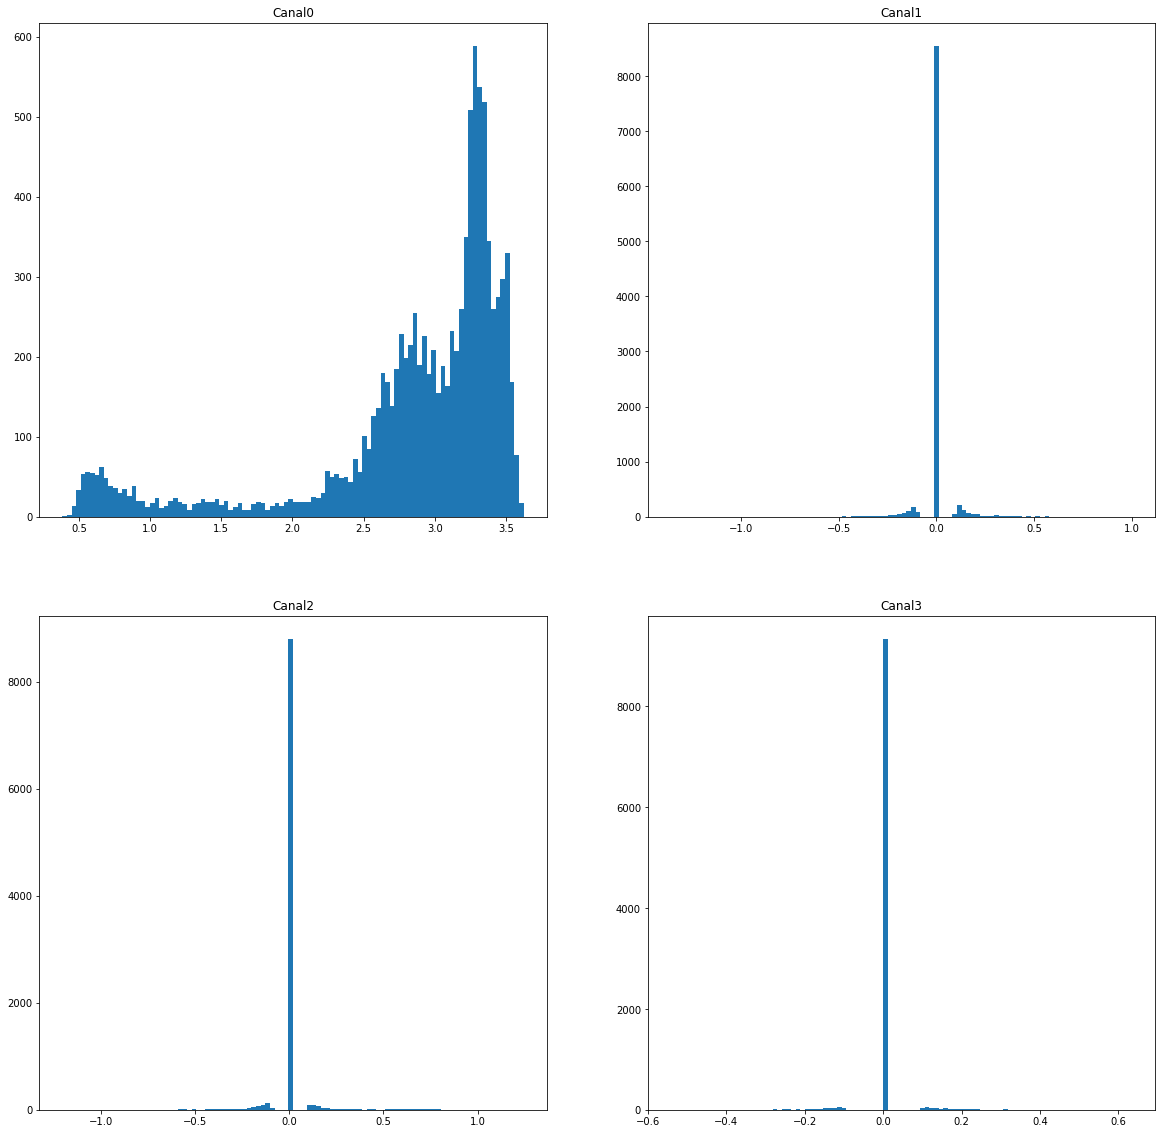

Calculez la proportion de valeurs à 0 dans cette représentation.

Proportion de valeur à 0 dans la décomposition initiale: 2.38%
Proportion de valeur à 0 dans la décomposition modifiée: 66.68%


Reconstruisez l'image à partir de la décomposition modifiée de la question précédente. Comparez là à l'image initiale.

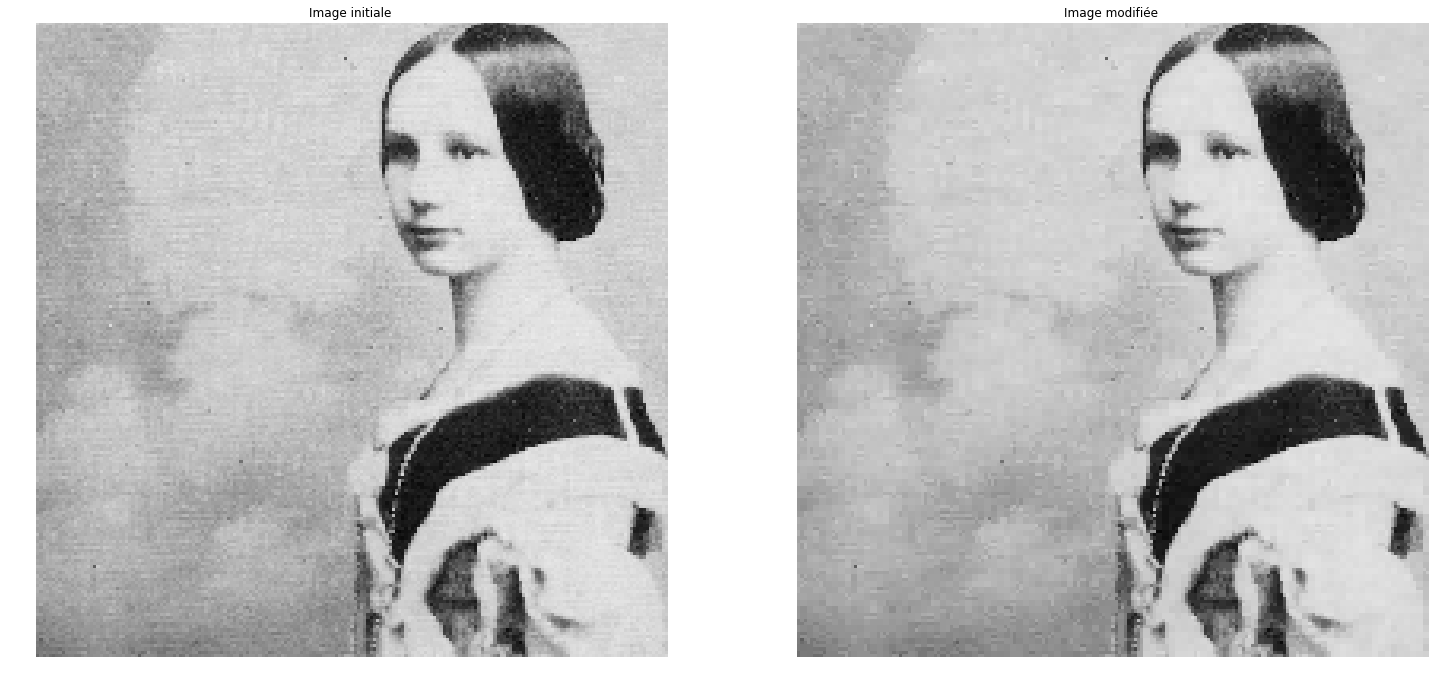

Comparez les reconstructions avec des valeurs différentes d'interval pour l'écrasement des valeurs de `im_out2`. Le mécanisme qui a été présenté ici est donné comme un exercice pédagogique pour vous faire comprendre avant tout le fonctionnement des opérateurs de Pytorch, ce n'est en aucun cas ce qu'il faut faire pour réaliser une vraie compression par ondelette.

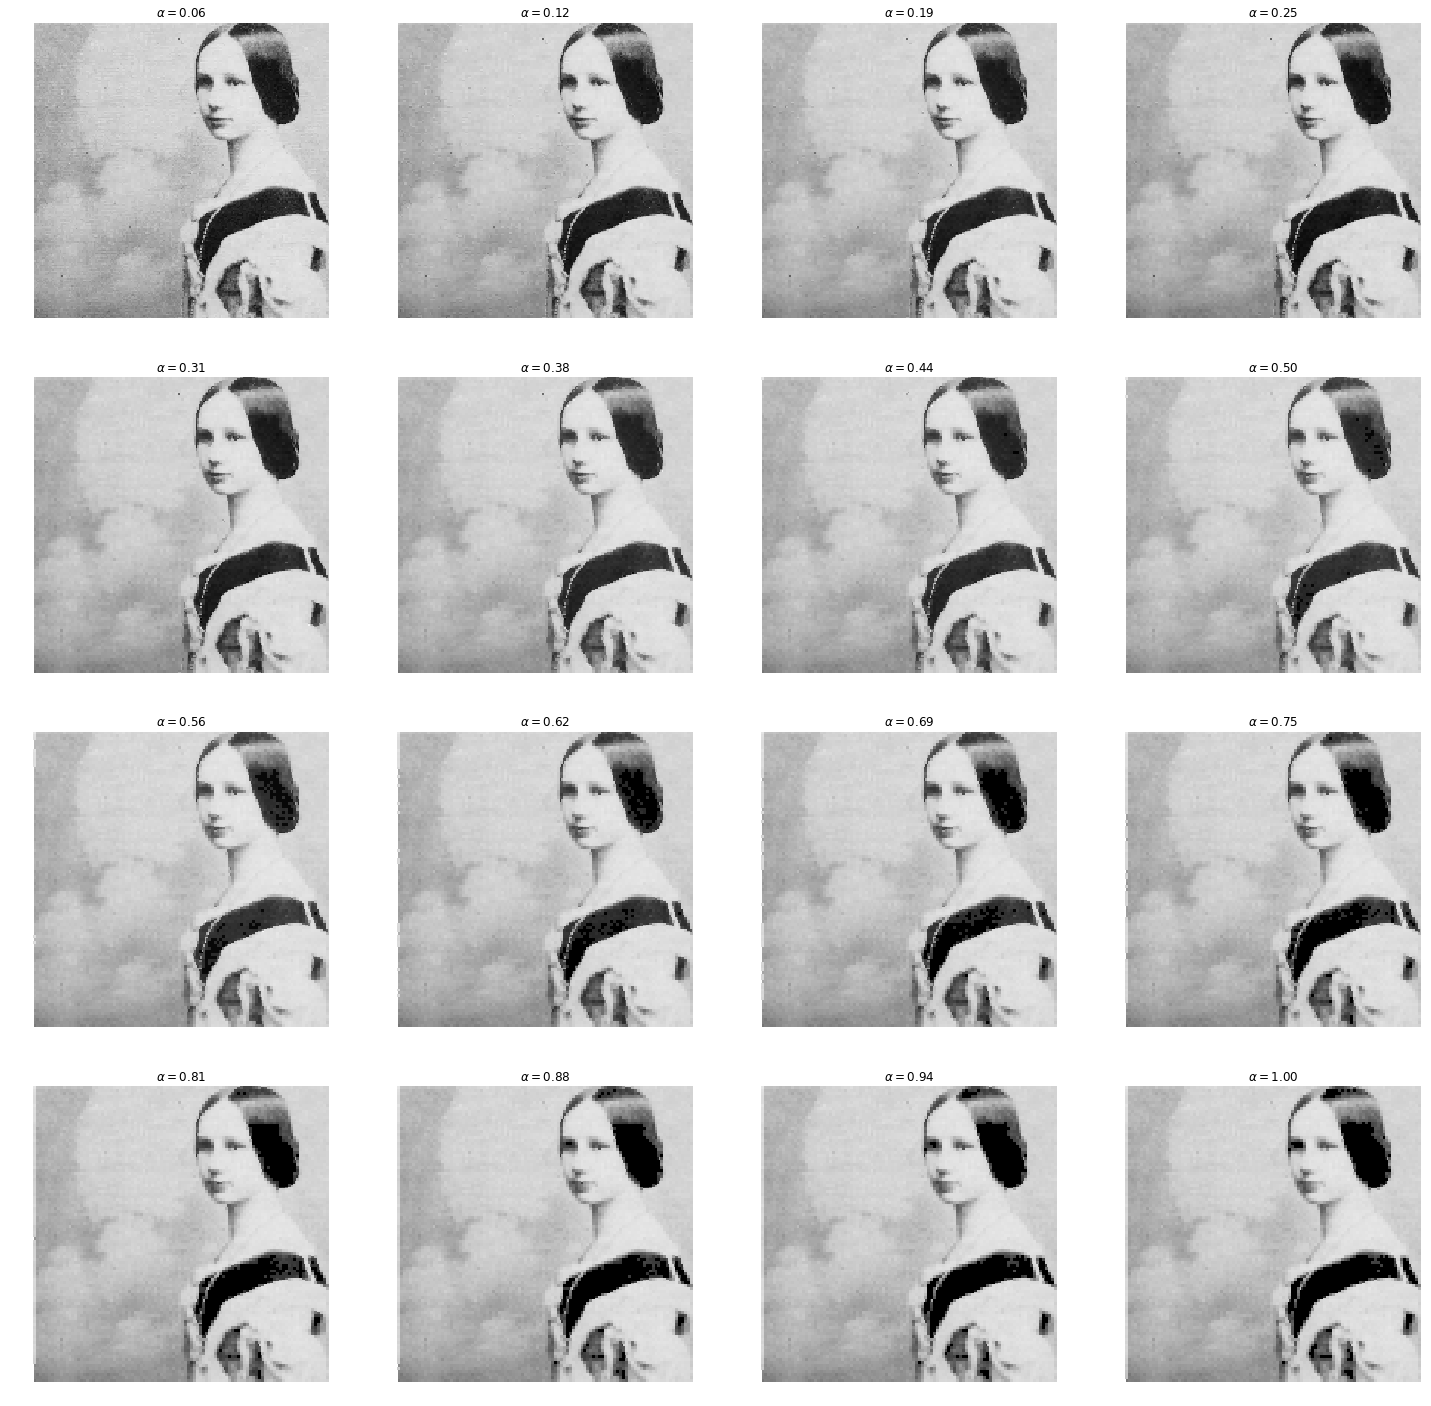